In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 74.4 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point


In [ ]:
ruta = gpd.datasets.get_path('nybb')
data= gpd.read_file(ruta)
data

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [ ]:
data.to_file('ny.geojson', drive='GeOJSON')

<AxesSubplot:>

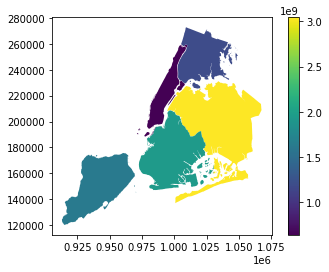

In [ ]:
data ['area'] = data.area
data.plot('area' , legend ='True')

In [ ]:
vacunarios = pd.read_csv('vacunarios.csv')
vacunarios

,nombre,latitud,longitud
0,CVC Aratirí ...,-25.339580,-57.485630
1,CVC - SND,-25.317007,-57.580824
2,HMI Trinidad ...,-25.261072,-57.578239
3,Ex CIMEFOR sobre ruta transchaco ...,-25.217190,-57.534198
4,CS Nº 9,-25.298869,-57.608375
5,Paseo Parque de la Salud Villa Elisa ...,-25.376354,-57.610609
6,CVC - SHOPPING PINEDO,-25.323498,-57.520845
7,Centro Civico - Sambódromo,-27.329062,-55.877121
8,POLIDEPORTIVO COL. NAC. LUQUE,-25.280990,-57.557499
9,Polideportivo Municipal de F. de la Mora (masi...,-25.319714,-57.550882


In [ ]:
aux = {'init' : 'epsg:4326'}

In [ ]:
puntos = vacunarios.apply(lambda fila: Point(float(fila.longitud), float(fila.latitud)), axis=1) #una serie porque tiene una sola dimesion, es una informacion geoespacial
puntos

0           POINT (-57.48563 -25.33958)
1         POINT (-57.580824 -25.317007)
2       POINT (-57.5782388 -25.2610717)
3          POINT (-57.534198 -25.21719)
4         POINT (-57.608375 -25.298869)
5       POINT (-57.6106087 -25.3763539)
6       POINT (-57.5208447 -25.3234978)
7       POINT (-55.8771212 -27.3290615)
8       POINT (-57.5574993 -25.2809897)
9        POINT (-57.550882 -25.3197138)
10       POINT (-56.434311 -25.4493851)
11      POINT (-57.6773263 -25.2729386)
12      POINT (-57.6294078 -25.3486604)
13       POINT (-57.6084937 -25.266799)
14      POINT (-55.7493619 -22.5475232)
15      POINT (-57.6467315 -25.2994021)
16      POINT (-57.4784727 -25.1645945)
17    POINT (-57.63378222 -25.29431348)
18        POINT (-57.412553 -25.371779)
19    POINT (-56.01016965 -25.46313904)
dtype: object

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

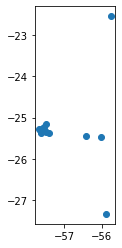

In [ ]:
geodata = gpd.GeoDataFrame(vacunarios, crs= aux, geometry=puntos)
geodata.plot()

In [ ]:
import matplotlib.pyplot as plt
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
paraguay =mundo[(mundo['name'] == 'Paraguay')]
fig, ax= plt.subplots(figsize=(20,15))
paraguay.plot(ax=ax, alpha=0.4, color='pink')
geodata.plot(column = 'nombre', ax =ax, legend =True)
plt.title('20 vacunatorios mas concurridos del Paraguay')

NameError: ignored

In [ ]:
import folium

py_folium = folium.Map(location = [ -23.442503,-58.443832], tiles ='Stamen Terrain ', zoom_start=6)
py_folium